# **CS224W - Colab 1**

In this Colab, we will write a full pipeline for **learning node embeddings**.
We will go through the following 3 steps.

To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

We will then work together to transform the graph structure into a PyTorch tensor, so that we can perform machine learning over the graph.

Finally, we will finish the first learning algorithm on graphs: a node embedding model. For simplicity, our model here is simpler than DeepWalk / node2vec algorithms taught in the lecture. But it's still rewarding and challenging, as we will write it from scratch via PyTorch.

Now let's get started!

**Note**: Make sure to **sequentially run all the cells**, so that the intermediate variables / packages will carry over to the next cell

# 1 Graph Basics
To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

## Setup
We will heavily use NetworkX in this Colab.

In [ ]:
import networkx as nx

## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

In [ ]:
G = nx.karate_club_graph()

# G is an undirected graph
print(type(G))
print(G.is_directed())  # Check if G is directed

<class 'networkx.classes.graph.Graph'>
False


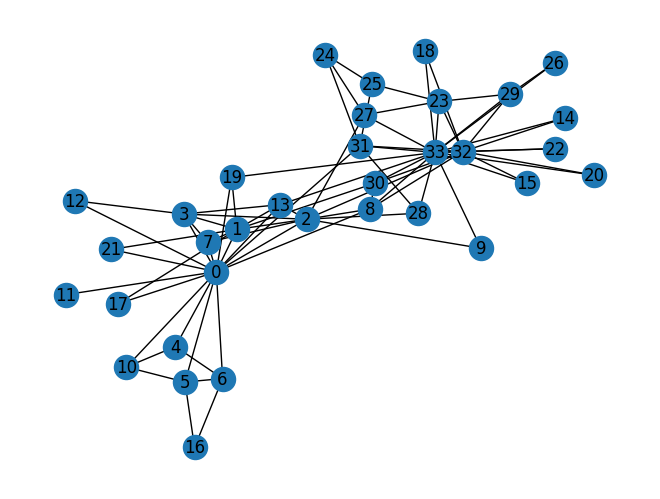

In [ ]:
# Visualize the graph
nx.draw(G, with_labels = True)

## Question 1: What is the average degree of the karate club network? (5 Points)

In [ ]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of
  # the graph. Round the result to nearest integer (for example
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  # Calculate the average degree using the formula
  avg_degree = (2 * num_edges) / num_nodes

  # Round the result to the nearest integer
  avg_degree = round(avg_degree)

  return avg_degree

In [ ]:
num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Number of edges of karate club network is {}".format(num_edges))
print("Number of nodes of karate club network is {}".format(num_nodes))
print("Average degree of karate club network is {}".format(avg_degree))

Number of edges of karate club network is 78
Number of nodes of karate club network is 34
Average degree of karate club network is 5


## Question 2: What is the average clustering coefficient of the karate club network? (5 Points)

In [ ]:
def average_clustering_coefficient(G):
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

  # Use the appropriate NetworkX function to compute the average clustering coefficient
  avg_cluster_coef = nx.average_clustering(G)

  # Round the result to 2 decimal places
  avg_cluster_coef = round(avg_cluster_coef, 2)

  return avg_cluster_coef

In [ ]:
avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


## Question 3: What is the PageRank value for node 0 (node with id 0) after one PageRank iteration? (5 Points)

Please complete the code block by implementing the PageRank equation: $r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$

In [ ]:
def one_iter_pagerank(G, beta, r0, node_id):
  # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
  # The return value r1 is one interation PageRank value for the input node.
  # Please round r1 to 2 decimal places.

  # Number of nodes in the graph
  N = G.number_of_nodes()

  # Base PageRank contribution
  r1 = (1 - beta) / N

  # Summing contributions from neighbors
  for neighbor in G.neighbors(node_id):
      r1 += beta * (r0 / G.degree[neighbor])

  # Round the result to 2 decimal places
  r1 = round(r1, 2)

  return r1

In [ ]:
beta = 0.8
r0 = 1 / G.number_of_nodes()  # Initialize r0 equally for all nodes
node = 0  # Node with id 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.13


## Question 4: What is the (raw) closeness centrality for the karate club network node 5? (5 Points)

The equation for closeness centrality is $c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$

In [ ]:
def closeness_centrality(G, node=5):
  # TODO: Implement the function that calculates closeness centrality
  # for a node in karate club network. G is the input karate club
  # network and node is the node id in the graph. Please round the
  # closeness centrality result to 2 decimal places.
  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized
  ## closeness directly, which is different from the raw (unnormalized)
  ## one that we learned in the lecture.

  # Calculate the normalized closeness centrality using NetworkX function
  normalized_closeness = nx.closeness_centrality(G, node)

  # Get the number of nodes in the graph
  N = G.number_of_nodes()

  # Convert normalized closeness centrality to raw closeness centrality
  raw_closeness = normalized_closeness * (N - 1)

  # Round the raw closeness centrality to 2 decimal places
  raw_closeness = round(raw_closeness, 2)

  return raw_closeness

In [ ]:
node = 5
cc_5 = closeness_centrality(G, node=node)
print("The karate club network has closeness centrality {}".format(cc_5))

The karate club network has closeness centrality 12.66


# 2 Graph to Tensor
We will then work together to transform the graph $G$ into a PyTorch tensor, so that we can perform machine learning over the graph.

## Setup
Check if PyTorch is properly installed

In [ ]:
import torch
print(torch.__version__)

2.4.1+cu121


## PyTorch tensor basics

We can generate PyTorch tensor with all zeros, ones or random values.

In [ ]:
# Generate 3 x 4 tensor with all ones
ones_tensor = torch.ones(3, 4)
print(ones_tensor)
print("==================")
# Get the shape of the tensor
print(ones_tensor.shape)

print("==================")
# Generate 3 x 4 tensor with all zeros
zeros_tensor = torch.zeros(3, 4)
print(zeros_tensor)

print("==================")
# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)



tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
torch.Size([3, 4])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.6536, 0.2098, 0.6057, 0.6122],
        [0.1031, 0.5510, 0.9801, 0.1313],
        [0.1437, 0.7282, 0.2582, 0.5672]])


PyTorch tensor contains elements for a single data type, the `dtype`.

In [ ]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


## Question 5: Getting the edge list of the karate club network and transform it into `torch.LongTensor`. What is the `torch.sum` value of `pos_edge_index` tensor? (10 Points)

In [1]:
G.number_of_edges()

NameError: name 'G' is not defined

In [ ]:
G.edges() # a list of tuples where each tuple represents an edge connected by two nodes.

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 200})'''))

list(G.edges()) # a list of tuples with shape [len(edge_list) x 2].

<IPython.core.display.Javascript object>

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 2),
 (1, 3),
 (1, 7),
 (1, 13),
 (1, 17),
 (1, 19),
 (1, 21),
 (1, 30),
 (2, 3),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 13),
 (2, 27),
 (2, 28),
 (2, 32),
 (3, 7),
 (3, 12),
 (3, 13),
 (4, 6),
 (4, 10),
 (5, 6),
 (5, 10),
 (5, 16),
 (6, 16),
 (8, 30),
 (8, 32),
 (8, 33),
 (9, 33),
 (13, 33),
 (14, 32),
 (14, 33),
 (15, 32),
 (15, 33),
 (18, 32),
 (18, 33),
 (19, 33),
 (20, 32),
 (20, 33),
 (22, 32),
 (22, 33),
 (23, 25),
 (23, 27),
 (23, 29),
 (23, 32),
 (23, 33),
 (24, 25),
 (24, 27),
 (24, 31),
 (25, 31),
 (26, 29),
 (26, 33),
 (27, 33),
 (28, 31),
 (28, 33),
 (29, 32),
 (29, 33),
 (30, 32),
 (30, 33),
 (31, 32),
 (31, 33),
 (32, 33)]

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 200})'''))

torch.LongTensor(list(G.edges())) # a tensor with shape [len(edge_list) x 2].

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  6],
        [ 4, 10],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6, 16],
        [ 8, 30],
        [ 8, 32],
        [ 8, 33],
        [ 9, 33],
        [13, 33],
        [14, 32],
        [14, 33],
        [15, 32],
        [15, 33],
        [18, 32],
        [18, 33],
        [19, 33],
        [20, 32],
        [20, 33],
        [2

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 200})'''))

torch.LongTensor(list(G.edges())).t() # a tensor with shape [2 x len(edge_list)].

<IPython.core.display.Javascript object>

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
          4,  5,  5,  5,  6,  8,  8,  8,  9, 13, 14, 14, 15, 15, 18, 18, 19, 20,
         20, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 26, 26, 27, 28, 28, 29,
         29, 30, 30, 31, 31, 32],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  2,  3,
          7, 13, 17, 19, 21, 30,  3,  7,  8,  9, 13, 27, 28, 32,  7, 12, 13,  6,
         10,  6, 10, 16, 16, 30, 32, 33, 33, 33, 32, 33, 32, 33, 32, 33, 33, 32,
         33, 32, 33, 25, 27, 29, 32, 33, 25, 27, 31, 31, 29, 33, 33, 31, 33, 32,
         33, 32, 33, 32, 33, 33]])

In [ ]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected
  # by two nodes.

  # Get the edge list from the NetworkX graph
  edge_list = list(G.edges())

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2 x len(edge_list)].

  # Transform edge list to a torch.LongTensor
  edge_index = torch.LongTensor(edge_list).t()  # Transpose to get the shape [2 x len(edge_list)]

  return edge_index

In [ ]:
pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)

print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))

# to get the sum of all the tensor elements.
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index))) # The sum value would be the sum of all node IDs in the edge list.

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


## Question 6: Please implement following function that samples negative edges. Then you will answer which edges (edge_1 to edge_5) can be negative ones in the karate club network? (10 Points)

In [ ]:
import random

# Function to sample negative edges
def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges (edges that do not exist in the graph).
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation
  # works on the karate club network. In this implementation, self loop should
  # not be considered as either a positive or negative edge. Also, notice that
  # the karate club network is an undirected graph, if (0, 1) is a positive
  # edge, do you think (1, 0) can be a negative one?

  # Get all possible node pairs excluding self-loops
  possible_edges = [(i, j) for i in G.nodes() for j in G.nodes() if i != j]

  # Remove existing positive edges (and their reverse) from the possible edges
  positive_edges = set(G.edges())
  possible_edges = [edge for edge in possible_edges if edge not in positive_edges and (edge[1], edge[0]) not in positive_edges]

  # Randomly sample the specified number of negative edges
  neg_edge_list = random.sample(possible_edges, num_neg_samples)

  return neg_edge_list

In [ ]:
# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

The neg_edge_index tensor has shape torch.Size([2, 78])


In [ ]:
# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

edges = [edge_1, edge_2, edge_3, edge_4, edge_5]

# Now, let's check which of the provided edges can be negative ones
def is_negative_edge(edge, G):
  return edge not in G.edges() and (edge[1], edge[0]) not in G.edges()

edges = [edge_1, edge_2, edge_3, edge_4, edge_5]
for i, edge in enumerate(edges, 1):
  if is_negative_edge(edge, G):
    print(f"Edge {i}: {edge} can be a negative edge.")
  else:
    print(f"Edge {i}: {edge} cannot be a negative edge.")

Edge 1: (7, 1) cannot be a negative edge.
Edge 2: (1, 33) can be a negative edge.
Edge 3: (33, 22) cannot be a negative edge.
Edge 4: (0, 4) cannot be a negative edge.
Edge 5: (4, 2) can be a negative edge.


# 3 Node Emebedding Learning

Finally, we will finish the first learning algorithm on graphs: a node embedding model.


## Setup

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

2.4.1+cu121


To write our own node embedding learning methods, we'll heavily use the [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module in PyTorch. Let's see how to use `nn.Embedding`:

In [ ]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


We can select items from the embedding matrix, by using Tensor indices

In [ ]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[ 0.3845, -2.4100, -1.0718, -0.1715, -0.5959, -0.7053, -0.2039,  0.6196]],
       grad_fn=<EmbeddingBackward0>)
tensor([[ 0.3845, -2.4100, -1.0718, -0.1715, -0.5959, -0.7053, -0.2039,  0.6196],
        [-0.5949, -0.3033,  0.5419, -0.0032, -0.7789,  1.0041, -1.1971, -0.0226]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


Now, it's your time to create node embedding matrix for the graph we have!
- We want to have **16 dimensional** vector for each node in the karate club network.
- We want to initalize the matrix under **uniform distribution**, in the range of $[0, 1)$. We suggest you using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [ ]:
# This ensures that the random numbers generated by torch.rand() are reproducible, so the embedding weights are initialized in the same way each time the code is run.
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change
  # the values of num_node and embedding_dim. The weight matrix of returned
  # layer should be initialized under uniform distribution.

  # Initialize the embedding layer
  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)

  # Initialize the weights of the embedding layer with uniform distribution
  emb.weight.data = torch.rand(num_node, embedding_dim)

  return emb

In [ ]:
# Create the node embedding
emb = create_node_emb()

# Print the embedding layer
print("Embedding layer: \n{}".format(emb))

Embedding layer: 
Embedding(34, 16)


In [ ]:
# Select an embedding in emb
id = torch.LongTensor([0])
print(emb(id))

tensor([[0.2933, 0.9107, 0.4504, 0.8110, 0.1312, 0.5698, 0.8625, 0.5277, 0.3248,
         0.2954, 0.8413, 0.6972, 0.5335, 0.7955, 0.2398, 0.1203]],
       grad_fn=<EmbeddingBackward0>)


In [ ]:
emb.weight.data[0]

tensor([0.2933, 0.9107, 0.4504, 0.8110, 0.1312, 0.5698, 0.8625, 0.5277, 0.3248,
        0.2954, 0.8413, 0.6972, 0.5335, 0.7955, 0.2398, 0.1203])

In [ ]:
emb.weight.data[0].numpy()

array([0.29326177, 0.91072273, 0.45043594, 0.81098646, 0.13124877,
       0.5697728 , 0.86245346, 0.527736  , 0.32480174, 0.29537517,
       0.84131694, 0.697235  , 0.5335283 , 0.79550874, 0.23984337,
       0.12033278], dtype=float32)

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 200})'''))

emb.weight.data.numpy()

<IPython.core.display.Javascript object>

array([[0.29326177, 0.91072273, 0.45043594, 0.81098646, 0.13124877,
        0.5697728 , 0.86245346, 0.527736  , 0.32480174, 0.29537517,
        0.84131694, 0.697235  , 0.5335283 , 0.79550874, 0.23984337,
        0.12033278],
       [0.38713378, 0.8662829 , 0.01641023, 0.25170612, 0.62124956,
        0.6884218 , 0.7502296 , 0.6513265 , 0.05876219, 0.33725458,
        0.8074643 , 0.58612525, 0.77441067, 0.87467945, 0.78593946,
        0.29220754],
       [0.26033092, 0.41250986, 0.4846272 , 0.4564861 , 0.4042865 ,
        0.5670356 , 0.8146361 , 0.1562233 , 0.7538897 , 0.00554919,
        0.53383285, 0.04447103, 0.9827544 , 0.07488912, 0.22060156,
        0.83031446],
       [0.76449025, 0.8932351 , 0.63700455, 0.05049741, 0.1494422 ,
        0.8423296 , 0.01312453, 0.95030355, 0.41534394, 0.5913698 ,
        0.47856385, 0.37398708, 0.37737125, 0.64907205, 0.4121812 ,
        0.58455503],
       [0.91899735, 0.54501915, 0.10741204, 0.12145013, 0.8179065 ,
        0.67480284, 0.5959238 , 

In [ ]:
emb.weight.data.shape

torch.Size([34, 16])

In [ ]:
# Create an example tensor with node ids 0 and 3
ids = torch.LongTensor([0, 3])

# Get the embeddings for node 0 and 3
print("Embeddings for node 0 and 3: \n{}".format(emb(ids)))

Embeddings for node 0 and 3: 
tensor([[0.2933, 0.9107, 0.4504, 0.8110, 0.1312, 0.5698, 0.8625, 0.5277, 0.3248,
         0.2954, 0.8413, 0.6972, 0.5335, 0.7955, 0.2398, 0.1203],
        [0.7645, 0.8932, 0.6370, 0.0505, 0.1494, 0.8423, 0.0131, 0.9503, 0.4153,
         0.5914, 0.4786, 0.3740, 0.3774, 0.6491, 0.4122, 0.5846]],
       grad_fn=<EmbeddingBackward0>)


## Visualize the initial node embeddings
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then visualize each point, colored by the community it belongs to.

In [ ]:
for node in G.nodes(data=True):
  print(node)
  print(node[0])
  print("=================")


(0, {'club': 'Mr. Hi'})
0
(1, {'club': 'Mr. Hi'})
1
(2, {'club': 'Mr. Hi'})
2
(3, {'club': 'Mr. Hi'})
3
(4, {'club': 'Mr. Hi'})
4
(5, {'club': 'Mr. Hi'})
5
(6, {'club': 'Mr. Hi'})
6
(7, {'club': 'Mr. Hi'})
7
(8, {'club': 'Mr. Hi'})
8
(9, {'club': 'Officer'})
9
(10, {'club': 'Mr. Hi'})
10
(11, {'club': 'Mr. Hi'})
11
(12, {'club': 'Mr. Hi'})
12
(13, {'club': 'Mr. Hi'})
13
(14, {'club': 'Officer'})
14
(15, {'club': 'Officer'})
15
(16, {'club': 'Mr. Hi'})
16
(17, {'club': 'Mr. Hi'})
17
(18, {'club': 'Officer'})
18
(19, {'club': 'Mr. Hi'})
19
(20, {'club': 'Officer'})
20
(21, {'club': 'Mr. Hi'})
21
(22, {'club': 'Officer'})
22
(23, {'club': 'Officer'})
23
(24, {'club': 'Officer'})
24
(25, {'club': 'Officer'})
25
(26, {'club': 'Officer'})
26
(27, {'club': 'Officer'})
27
(28, {'club': 'Officer'})
28
(29, {'club': 'Officer'})
29
(30, {'club': 'Officer'})
30
(31, {'club': 'Officer'})
31
(32, {'club': 'Officer'})
32
(33, {'club': 'Officer'})
33


In [ ]:
def visualize_emb(emb):
  # Extract the weights from the embedding layer as a NumPy array
  X = emb.weight.data.numpy()

  # Perform PCA (Principal Component Analysis) to reduce the dimensionality of the embedding vectors to 2D for visualization
  pca = PCA(n_components=2)
  components = pca.fit_transform(X) # `components` contains the 2D PCA projection of each node's embedding

  # Create a new figure for the plot, with a specific size (6x6 inches)
  plt.figure(figsize=(6, 6))

  # Prepare empty lists to store the coordinates of the nodes in two different clubs
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []

  # Iterate through the nodes of the graph `G` (with their attributes)
  for node in G.nodes(data=True):
    # If the node belongs to 'Mr. Hi' club, add its coordinates to club1_x and club1_y
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    # If the node belongs to the 'Officer' club, add its coordinates to club2_x and club2_y
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])


  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

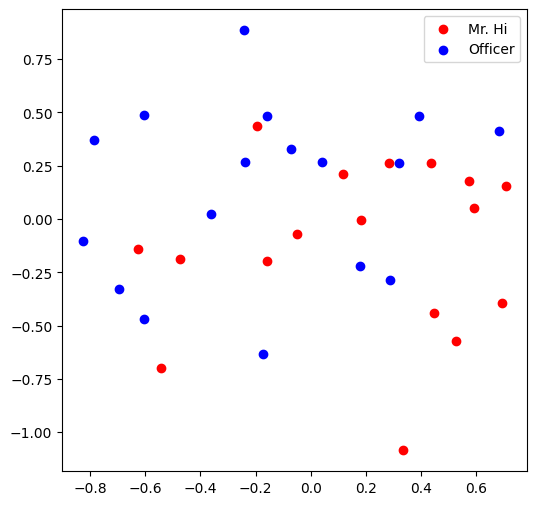

In [ ]:
# Visualize the initial random embeddding
visualize_emb(emb)

## Question 7: Training the embedding! What is the best performance you can get? Please report both the best loss and accuracy on Gradescope. (20 Points)

In [ ]:
from torch.optim import SGD

def accuracy(pred, label): # The function will take in the predicted probabilities (after sigmoid) and the ground truth labels.
  # TODO: Implement the accuracy function. This function takes the
  # predicted probabilities tensor (the resulting tensor after sigmoid) and the label
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places.
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  # Classify predictions as 1 if pred > 0.5, otherwise 0
  pred_label = (pred > 0.5).long()

  # Compute the accuracy by comparing predicted labels with the actual labels
  correct = (pred_label == label).sum().item()

  # Accuracy calculation
  accu = correct / len(label)

  # Round to 4 decimal places
  accu = round(accu, 4)

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and
  # learning rate. In general, you need to implement:
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch
  # (as a sanity check, the loss should decrease during training)

  epochs = 500
  learning_rate = 0.1

  # Using stochastic gradient descent (SGD) optimizer
  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):
      # Zero the gradients before each training step
      optimizer.zero_grad()

      # Get the embeddings for each node in the edge pairs
      node1_emb = emb(train_edge[0])  # Embedding for node i
      node2_emb = emb(train_edge[1])  # Embedding for node j

      # Calculate the dot product between the embeddings of node pairs
      dot_product = torch.sum(node1_emb * node2_emb, dim=1)

      # Apply sigmoid to the dot product
      pred = sigmoid(dot_product)

      # Compute the loss using binary cross-entropy loss
      loss = loss_fn(pred, train_label)

      # Backpropagate the loss and update weights
      loss.backward()
      optimizer.step()

      # Calculate accuracy for the current predictions
      acc = accuracy(pred, train_label)

      # Print the loss and accuracy for each epoch
      if i % 50 == 0:  # Print every 50 epochs for clarity
          print(f'Epoch {i}, Loss: {loss.item():.4f}, Accuracy: {acc}')

# Define loss function and sigmoid
loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)

# Train the model
train(emb, loss_fn, sigmoid, train_label, train_edge)

Epoch 0, Loss: 1.8512, Accuracy: 0.5
Epoch 50, Loss: 0.4710, Accuracy: 0.8077
Epoch 100, Loss: 0.2946, Accuracy: 0.9487
Epoch 150, Loss: 0.1776, Accuracy: 0.9872
Epoch 200, Loss: 0.1102, Accuracy: 1.0
Epoch 250, Loss: 0.0725, Accuracy: 1.0
Epoch 300, Loss: 0.0510, Accuracy: 1.0
Epoch 350, Loss: 0.0379, Accuracy: 1.0
Epoch 400, Loss: 0.0296, Accuracy: 1.0
Epoch 450, Loss: 0.0239, Accuracy: 1.0


## Visualize the final node embeddings
Visualize your final embedding here!
You can visually compare the figure with the previous embedding figure.
After training, you should oberserve that the two classes are more evidently separated.
This is a great sanitity check for your implementation as well.

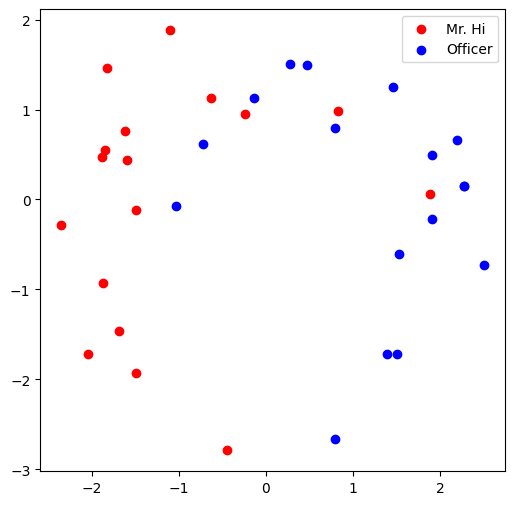

In [ ]:
# Visualize the final learned embedding
visualize_emb(emb)

# Submission

In order to get credit, you must go submit your answers on Gradescope.